In [63]:
import pandas as pd
import numpy as np
from sklearn import preprocessing, neighbors, svm
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.ensemble import RandomForestClassifier

### Reading the Excel Files

In [6]:
df_1 = pd.read_excel("processed16.xlsx", index = False) 
df_2 = pd.read_excel("processed17.xlsx", index = False) 
df_3 = pd.read_excel("processed20.xlsx", index = False) 
df_4 = pd.read_excel("processed21.xlsx", index = False) 

### Removing Unnecessary Columns

In [7]:
del df_1["No"]
del df_2["No"]
del df_3["No"]
del df_4["No"]

print(df_1.head())
print(df_2.head())
print(df_3.head())
print(df_4.head())

       M0_x      M1_x      M2_x     MD0_x     MD1_x     MD2_x     SD0_x  \
0  1.394119  0.637284  0.463757  1.601774  0.381614  0.276994  1.245807   
1  2.066465  1.730292  1.113678  2.666776  2.216044  0.914209  1.927013   
2  1.161569  0.503600  0.306685  1.195601  0.385100  0.270009  1.206749   
3  2.305346  1.733458  1.104182  2.799916  2.220912  1.056708  1.846857   
4 -0.276192  1.014577  1.063574 -0.517206  0.962020  1.163994  1.269491   

      SD1_x     SD2_x      T1_x      T2_x               maneuver  
0  1.245486  1.171420 -0.085753  0.083711  Aggressive right turn  
1  1.649476  1.645949  0.674640 -0.057853  Aggressive right turn  
2  1.310202  1.228890 -0.132898 -0.075022  Aggressive right turn  
3  1.655223  1.728814  0.503859 -0.066962  Aggressive right turn  
4  2.041803  1.803892 -8.346903 -4.205663  Aggressive right turn  
       M0_x      M1_x      M2_x     MD0_x     MD1_x     MD2_x     SD0_x  \
0  1.702217  0.279212  0.242504  1.662000  0.044323  0.104625  1.495990 

### Removing the First Rows for Concatenation

In [8]:
frames = [df_1, df_2, df_3, df_4]
df_final = pd.concat(frames)

In [9]:
pd.set_option('display.max_rows', 300) #Maxing out the columns for display
df_final = df_final.reset_index(drop=True)

### Final Dataframe for Analysis

In [10]:
print(df_final)

         M0_x      M1_x      M2_x     MD0_x     MD1_x     MD2_x     SD0_x  \
0    1.394119  0.637284  0.463757  1.601774  0.381614  0.276994  1.245807   
1    2.066465  1.730292  1.113678  2.666776  2.216044  0.914209  1.927013   
2    1.161569  0.503600  0.306685  1.195601  0.385100  0.270009  1.206749   
3    2.305346  1.733458  1.104182  2.799916  2.220912  1.056708  1.846857   
4   -0.276192  1.014577  1.063574 -0.517206  0.962020  1.163994  1.269491   
5    1.057980  0.603456  0.409548  0.980821  0.322531  0.240121  0.899796   
6    2.963837  2.010909  1.390250  3.064371  1.941753  0.980821  0.985041   
7    0.090732  1.527285  1.370850  0.146130  1.906460  1.349082  1.729395   
8    1.682016  1.166846  0.876524  1.263351  0.734280  0.547395  1.686127   
9    1.964294  1.821785  1.432662  2.084320  2.017066  1.192319  2.037052   
10   1.537479  0.873637  0.616415  1.265599  0.525798  0.369131  1.497012   
11   2.865773  2.195051  1.528945  2.974531  1.946673  0.903831  1.511951   

In [11]:
X = np.array(df_final.drop(['maneuver'], 1))
y = np.array(df_final['maneuver'])

In [12]:
print(y)

['Aggressive right turn' 'Aggressive right turn' 'Aggressive right turn'
 'Aggressive right turn' 'Aggressive right turn' 'Aggressive left turn'
 'Aggressive left turn' 'Aggressive left turn' 'Aggressive left turn'
 'Aggressive left turn' 'Aggressive left turn' 'Aggressive left turn'
 'Aggressive left turn' 'Aggressive right turn' 'Aggressive right turn'
 'Aggressive right turn' 'Aggressive left turn' 'Aggressive left turn'
 'Aggressive left turn' 'Aggressive right turn' 'Aggressive right turn'
 'Aggressive right turn' 'Aggressive right turn' 'Aggressive right turn'
 'Aggressive left turn' 'Aggressive left turn'
 'Aggressive right lane change' 'Aggressive right lane change'
 'Aggressive right lane change' 'Aggressive right lane change'
 'Aggressive right lane change' 'Aggressive right lane change'
 'Aggressive right lane change' 'Aggressive right lane change'
 'Aggressive right lane change' 'Aggressive right lane change'
 'Aggressive right lane change' 'Aggressive breaking'
 'Aggressiv

## Exploratory Data Analysis

In [13]:
df_final.hist(column='M0_x', bins = 30)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000096944CCE10>]],
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000009694726978>]],
      dtype=object)

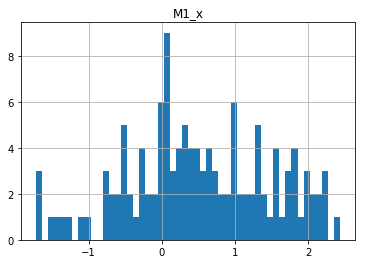

In [14]:
df_final.hist(column='M1_x', bins = 50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000969480A860>]],
      dtype=object)

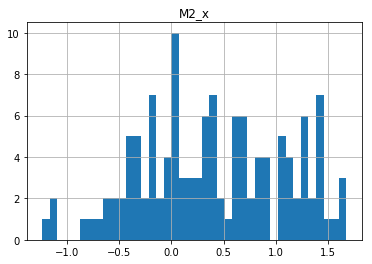

In [15]:
df_final.hist(column='M2_x', bins = 40)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000096948B9D68>]],
      dtype=object)

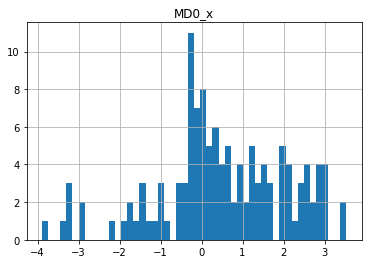

In [16]:
df_final.hist(column='MD0_x', bins = 50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000969495F898>]],
      dtype=object)

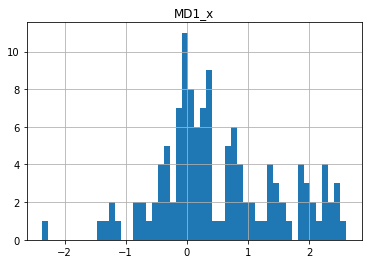

In [17]:
df_final.hist(column='MD1_x', bins = 50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000009694A4C198>]],
      dtype=object)

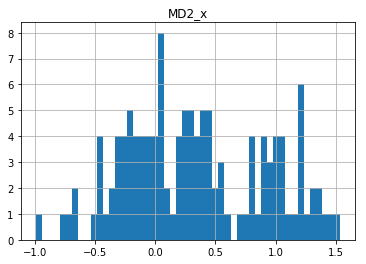

In [18]:
df_final.hist(column='MD2_x', bins = 50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000009694B0CE48>]],
      dtype=object)

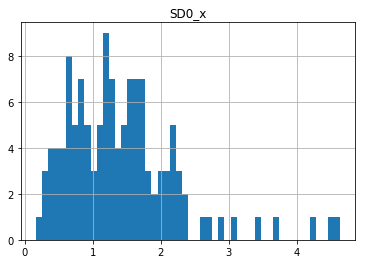

In [19]:
df_final.hist(column='SD0_x', bins = 50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000009694BF22E8>]],
      dtype=object)

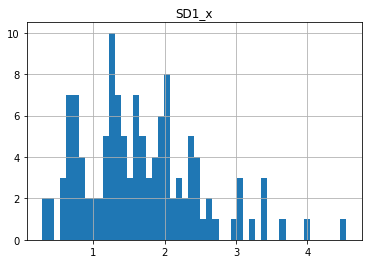

In [20]:
df_final.hist(column='SD1_x', bins = 50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000009694CA75F8>]],
      dtype=object)

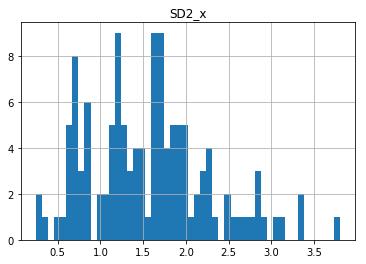

In [21]:
df_final.hist(column='SD2_x', bins = 50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000009694D799E8>]],
      dtype=object)

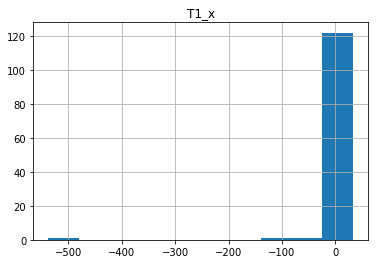

In [22]:
df_final.hist(column='T1_x', bins = 10)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000009694DF0F60>]],
      dtype=object)

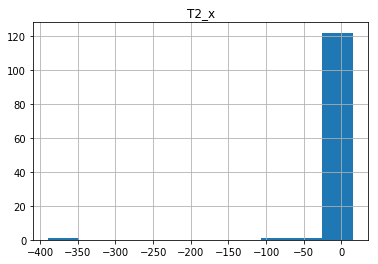

In [23]:
df_final.hist(column='T2_x', bins = 10)

### Normalized Data

In [24]:
temp_df = df_final.drop(['maneuver'], 1)
#df_final.dtypes
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

normalized_df = normalize(temp_df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000009695BE21D0>]],
      dtype=object)

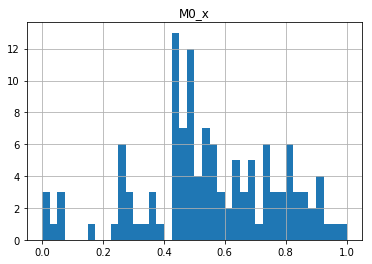

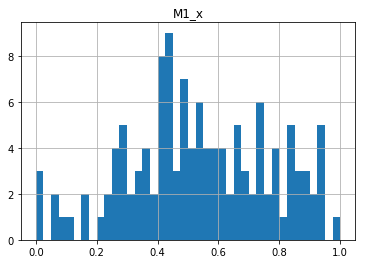

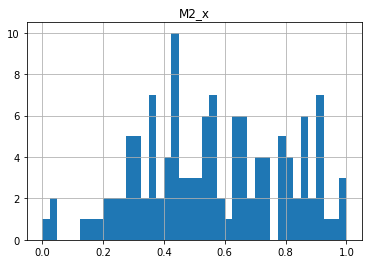

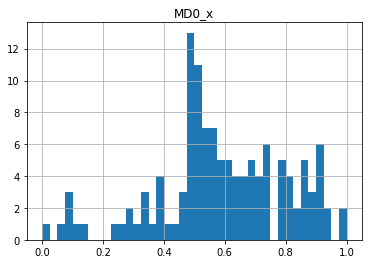

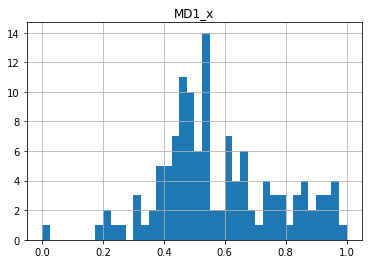

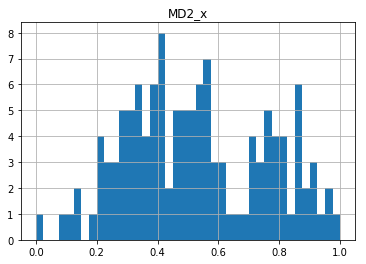

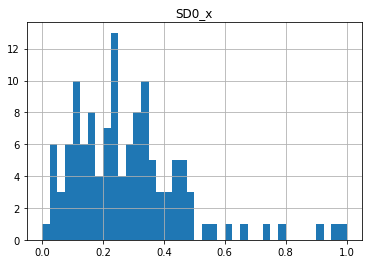

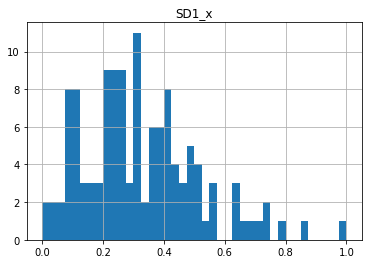

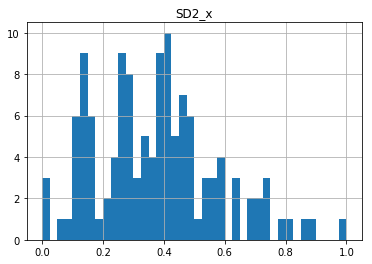

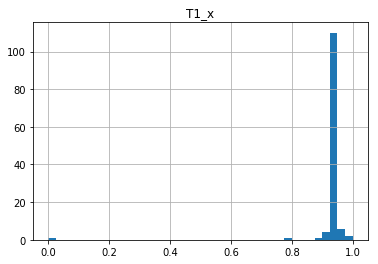

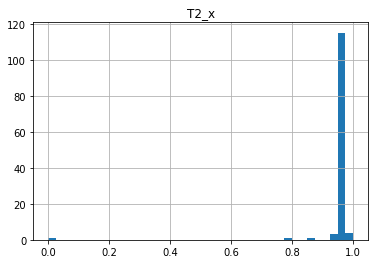

In [25]:
normalized_df.hist(column='M0_x', bins = 40)
normalized_df.hist(column='M1_x', bins = 40)
normalized_df.hist(column='M2_x', bins = 40)
normalized_df.hist(column='MD0_x', bins = 40)
normalized_df.hist(column='MD1_x', bins = 40)
normalized_df.hist(column='MD2_x', bins = 40)
normalized_df.hist(column='SD0_x', bins = 40)
normalized_df.hist(column='SD1_x', bins = 40)
normalized_df.hist(column='SD2_x', bins = 40)
normalized_df.hist(column='T1_x', bins = 40)
normalized_df.hist(column='T2_x', bins = 40)

In [26]:
X = np.array(normalized_df)
y = np.array(df_final['maneuver'])

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [45]:
clf = svm.SVC(gamma = 'auto')

In [46]:
clf_1 = svm.SVC(kernel='linear', C=0.01)

In [47]:
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)
print(confidence)

0.36


In [48]:
clf_1.fit(X_train, y_train)
confidence_1 = clf_1.score(X_test, y_test)
print(confidence_1)

0.24


In [49]:
example_measures = np.array([[1.39,0.6,0.4,1.4,0.3,0.2,1.2,1.1,1.17,-0.08, 0.08]])
example_measures = example_measures.reshape(len(example_measures), -1)
prediction = clf.predict(example_measures)
print(prediction)

['Aggressive right turn']


## SVM

In [50]:
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf', 'linear']}  

grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)

grid.fit(X_train, y_train) 

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.22857142857142856, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.2647058823529412, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.22580645161290322, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV]  C=0.1, gamma=1, kernel=linear, score=0.22857142857142856, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV]  C=0.1, gamma=1, kernel=linear, score=0.20588235294117646, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV]  C=0.1, gamma=1, kernel=linear, score=0.3225806451612903, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf .....................

[CV]  C=100, gamma=1, kernel=linear, score=0.41935483870967744, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV]  C=100, gamma=0.1, kernel=rbf, score=0.5428571428571428, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] .......... C=100, gamma=0.1, kernel=rbf, score=0.5, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV]  C=100, gamma=0.1, kernel=rbf, score=0.4838709677419355, total=   0.0s
[CV] C=100, gamma=0.1, kernel=linear .................................
[CV]  C=100, gamma=0.1, kernel=linear, score=0.5142857142857142, total=   0.0s
[CV] C=100, gamma=0.1, kernel=linear .................................
[CV]  C=100, gamma=0.1, kernel=linear, score=0.5294117647058824, total=   0.0s
[CV] C=100, gamma=0.1, kernel=linear .................................
[CV]  C=100, gamma=0.1, kernel=linear, score=0.41935483870967744, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf 

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.6s finished
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf', 'linear']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [51]:
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [52]:
grid_predictions = grid.predict(X_test) 

In [53]:
print(classification_report(y_test, grid_predictions)) 

                              precision    recall  f1-score   support

     Aggressive acceleration       0.57      0.67      0.62         6
         Aggressive breaking       0.50      0.40      0.44         5
 Aggressive left lane change       0.50      0.50      0.50         2
        Aggressive left turn       0.40      0.50      0.44         4
Aggressive right lane change       0.50      0.33      0.40         3
       Aggressive right turn       0.40      0.40      0.40         5

                   micro avg       0.48      0.48      0.48        25
                   macro avg       0.48      0.47      0.47        25
                weighted avg       0.48      0.48      0.48        25



In [69]:
grid_confidence = grid.score(X_test, y_test)
print(grid_confidence)

0.48


## Random Forest

In [56]:
rf = RandomForestRegressor(random_state = 42)

In [57]:
print(rf.get_params())

{'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 'warn', 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [64]:
forest = RandomForestClassifier(random_state = 1)

n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(forest, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)

bestF = gridF.fit(X_train, y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   16.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:  9.0min finished
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [65]:
y_pred = bestF.predict(X_test)

In [67]:
print(classification_report(y_test, y_pred)) 

                              precision    recall  f1-score   support

     Aggressive acceleration       0.36      0.67      0.47         6
         Aggressive breaking       0.00      0.00      0.00         5
 Aggressive left lane change       0.00      0.00      0.00         2
        Aggressive left turn       1.00      0.50      0.67         4
Aggressive right lane change       0.40      0.67      0.50         3
       Aggressive right turn       0.60      0.60      0.60         5

                   micro avg       0.44      0.44      0.44        25
                   macro avg       0.39      0.41      0.37        25
                weighted avg       0.42      0.44      0.40        25



C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [70]:
bestF_confidence = bestF.score(X_test, y_test)
print(bestF_confidence)

0.44
